## Part - 1

In [1]:
# Import the required libraries

import numpy as np
import pandas as pd
import csv
import pprint
import sys
import math
import matplotlib.pyplot as plt

# from IPython.utils import io

from neural_nets import NeuralNet

In [2]:
# Classify the dataset into X and Y

def classifyXY(dataset):
    X = np.array(dataset[:, 1:], dtype=float)
    Y = np.array(dataset[:, 0], dtype=int)
    
    return X, Y

In [3]:
# Load file function
def load_file(filename):
    train_data, test_data = [], []
    dataset = []

#     with open(filename) as csvfile:
#         lines = csv.reader(csvfile)
#         dataset = np.array(list(lines))

    dataset = pd.read_csv(filename)
    
    dataset = dataset.values
    
    dataset = np.array(dataset)

    np.random.shuffle(dataset)

    train_size = int(0.6 * len(dataset))
    val_size = int(0.2 * len(dataset))
    train_data = dataset[:train_size, :]
    train_data = np.array(train_data)
    val_data = dataset[train_size:, :]
    val_data = np.array(val_data)
    test_data = dataset[train_size+val_size:, :]
    test_data = np.array(test_data)
    
    X_train, y_train = classifyXY(train_data)
    X_val, y_val = classifyXY(val_data)
    X_test, y_test = classifyXY(test_data)


    return X_train, y_train, X_val, y_val, X_test, y_test

In [4]:
filename = './../Apparel/apparel-trainval.csv'
X_train, y_train, X_val, y_val, X_test, y_test = load_file(filename)
# X, Y = classifyXY(dataset)
# print(Y)

In [5]:
# Train the Network

input_size = 784
hidden_size = 50
num_classes = 10
num_layers = 3

net = NeuralNet(input_size, hidden_size, num_classes)

stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=5000, batch_size=100,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

val_acc = (net.predict(X_val) == y_val).mean()

print('Validation Accuracy:', val_acc)

iteration 0 / 5000: loss 2.302675
iteration 100 / 5000: loss 2.295403
iteration 200 / 5000: loss 2.029862
iteration 300 / 5000: loss 1.453421
iteration 400 / 5000: loss 1.221196
iteration 500 / 5000: loss 1.056020
iteration 600 / 5000: loss 1.003045
iteration 700 / 5000: loss 1.116743
iteration 800 / 5000: loss 0.820179
iteration 900 / 5000: loss 0.935798
iteration 1000 / 5000: loss 0.870416
iteration 1100 / 5000: loss 0.784964
iteration 1200 / 5000: loss 0.749923
iteration 1300 / 5000: loss 0.701094
iteration 1400 / 5000: loss 0.739819
iteration 1500 / 5000: loss 0.592459
iteration 1600 / 5000: loss 0.671417
iteration 1700 / 5000: loss 0.560193
iteration 1800 / 5000: loss 0.599069
iteration 1900 / 5000: loss 0.772102
iteration 2000 / 5000: loss 0.740640
iteration 2100 / 5000: loss 0.839369
iteration 2200 / 5000: loss 0.659114
iteration 2300 / 5000: loss 0.648108
iteration 2400 / 5000: loss 0.696218
iteration 2500 / 5000: loss 0.616745
iteration 2600 / 5000: loss 0.609462
iteration 270

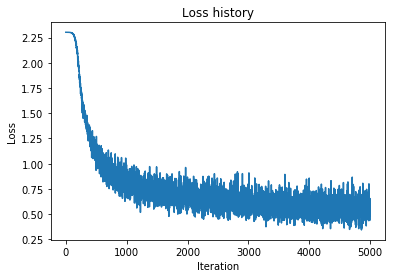

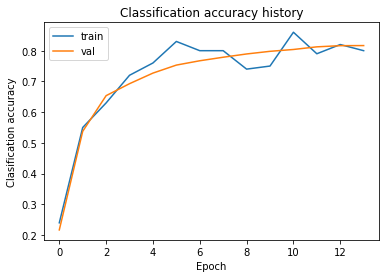

In [6]:
# Plot the loss function and train / validation accuracies
plt.plot
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

plt.plot
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.legend(loc='upper left')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.show()

As we can see in the above curves, the accuracy increases with the number of epochs, which implies that the error reduces significantly with the increase in number of epochs.

In [7]:
# Tune the hyperparameters
best_net = None

input_size = 28 * 28
hidden_size = 100
num_classes = 10
# num_layers = 3

net = NeuralNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=5000, batch_size=100,
            learning_rate=5e-4, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)
# print(net.predict(X_val))

best_net = net

iteration 0 / 5000: loss 2.302835
iteration 100 / 5000: loss 1.159619
iteration 200 / 5000: loss 0.895548
iteration 300 / 5000: loss 0.562522
iteration 400 / 5000: loss 0.706260
iteration 500 / 5000: loss 0.612796
iteration 600 / 5000: loss 0.598208
iteration 700 / 5000: loss 0.525333
iteration 800 / 5000: loss 0.604478
iteration 900 / 5000: loss 0.654540
iteration 1000 / 5000: loss 0.504286
iteration 1100 / 5000: loss 0.552862
iteration 1200 / 5000: loss 0.547672
iteration 1300 / 5000: loss 0.508360
iteration 1400 / 5000: loss 0.552001
iteration 1500 / 5000: loss 0.552434
iteration 1600 / 5000: loss 0.498899
iteration 1700 / 5000: loss 0.443414
iteration 1800 / 5000: loss 0.373428
iteration 1900 / 5000: loss 0.514728
iteration 2000 / 5000: loss 0.555491
iteration 2100 / 5000: loss 0.417010
iteration 2200 / 5000: loss 0.350740
iteration 2300 / 5000: loss 0.434302
iteration 2400 / 5000: loss 0.467768
iteration 2500 / 5000: loss 0.613692
iteration 2600 / 5000: loss 0.499404
iteration 270

In [8]:
# Run on test set
test_acc = (net.predict(X_test) == y_test).mean()

print('Test Accuracy:', test_acc)

predictions = net.predict(X_test)

Test Accuracy: 0.8590833333333333


In [9]:
predictions = np.array(predictions, dtype=int)
np.savetxt('20161191_predictions.csv', predictions)

#### Activation Function in best net : ReLU Activation Function
#### Loss Function in best net : Softmax Loss Function

- The ReLU Activation function is given by:
    f(x) = max(0, x)


- The Softmax loss function is given by:
    Softmax(x)<sub>j</sub> = $\frac{e^{x_j}}{\sum_{k=1}^K e^{x_k}}$
    
The best neural network as per my implementation is a 2-layer neural network, which is of the form:

<center>Input &rarr; Fully Connected Layer &rarr; ReLU Layer &rarr; Fully Connected Layer &rarr; Softmax &rarr; Output</center>

The best accuracy is occuring at 2 hidden layers. As I tried to increase the number of hidden layers to 3, the accuracy drastically dropped down to 9% from 85% in case pf 2 hidden layer network.

## Part - 2

As given in the question the dataset is the House Price Prediction Dataset, as given on kaggle.
- The dataset has dimensions 1460 X 81 for the train data.
- There are a total of 80 features and a total of 6 output labels.

Now, all the features are not numerical, so what we can do is to first create dictionaries with each categorical label being given a particular number as per our choice. This will help getting all the data as numerical data (because our whole neural network is designed for numerical data only).

Now, once we are done with changing the data to completely numerical data, we will modify our neural network to have 3 hidden layers (instead of 2 in best net for part 1).

So, what we have to do is to add one more layer in the network and add its backpropagation code.

One more thing, this problem is a regression problem, unlike the last problem which was a classification problem. So, the softmax and cross-entropy loss will not work here. We will have to use the regression loss function (best to use L2 loss), and change the gradient calculation correspondingly. This loss has to be minimized.

The regularized parameters and the learning parameters may get tweaked a bit.